## Assignment Title : Machine Learning 2 - Housing Pricing Prediction (Ridge & Lasso)

#### Submitted By : Nachiket Shembekar

### Objective

For a US based housing company 'Surprise Housing', based on sale of houses dataset, build a regression model using regularisation in order to predict the actual value of the prospective Australian properties and decide whether to invest in them or not. This model will help the management to understand how exactly the prices vary with the variables, understand overall pricing dynamics, and accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.

#### Overall Approach for Solution

1. Reading, Understanding, Cleaning and Visualizing the Data

   a. Reading & Understanding the Data   
   b. Cleaning the Data    
   c. Visualizing the Data 
     
2. Exploratory Data Analysis

3. Data Preparation for Model Building
    
4. Model Building

5. Ridge Regression

6. Lasso Regression

##### Importing the necessary Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Libraries related to Models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer
from pandas import DataFrame
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Increase the number of rows & columns being displayed for better clarity and analysis.
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

#### Step 1 : Reading, Understanding, Cleaning & Visualizing the Data

###### Step 1a. Reading & Understanding the Data

In [2]:
# Read the train.csv file. It's assumed that the file is already loaded in Jupyter notebook, hence only file name is mentioned.
# include low_memory=False to avoid DtypeWarning.

sp_housing_ds = pd.read_csv('train.csv',low_memory=False) 

In [3]:
# Before starting with Data cleaning, let's evaluate the dataset. Shape function will provide total rows & columns.
sp_housing_ds.shape

(1460, 81)

In [4]:
# Take a look at a quick snapshot of data to get understanding of various columns and data within them.
sp_housing_ds.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
sp_housing_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# We can see that multiple columns are numeric. We can find few useful statistics through below function.
sp_housing_ds.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

#####  Analysis of columns and elimination of redundant, irrelevant or less meaningful ones in perspective of the solution.

  1. Columns with null values.
  2. Columns having no duplicate rows, i.e. unique values for each row.
  3. Any additional columns, with the help of Data dictionary, which are irrelevant for the analysis.
  4. Segregation of Categorical and Numerical variables for further analysis.

In [7]:
## 1. Identifying columns with null values

## In case of current dataset, there are no columns with 'all null' values.
## We will try to identify null values within the columns.

sp_housing_ds_null_pcnt = round(sp_housing_ds.isnull().sum()*100/len(sp_housing_ds.index),2).sort_values(ascending=False)
sp_housing_ds_null_pcnt[sp_housing_ds_null_pcnt>0]

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

###### There's an important observation from the above output.
###### Several columns such as  Alley, PoolQC etc.  are showing high number of missing values. This is because of the value 'NA' that is appearing under all these columns which represents 'absence' of that particular feature.

In [8]:
# 2. Columns having no duplicate rows, i.e. unique values for each row
sp_housing_ds.nunique().sort_values(ascending=False)

Id               1460
LotArea          1073
GrLivArea         861
BsmtUnfSF         780
1stFlrSF          753
TotalBsmtSF       721
SalePrice         663
BsmtFinSF1        637
GarageArea        441
2ndFlrSF          417
MasVnrArea        327
WoodDeckSF        274
OpenPorchSF       202
BsmtFinSF2        144
EnclosedPorch     120
YearBuilt         112
LotFrontage       110
GarageYrBlt        97
ScreenPorch        76
YearRemodAdd       61
Neighborhood       25
LowQualFinSF       24
MiscVal            21
3SsnPorch          20
Exterior2nd        16
MSSubClass         15
Exterior1st        15
TotRmsAbvGrd       12
MoSold             12
OverallQual        10
Condition1          9
OverallCond         9
SaleType            9
PoolArea            8
RoofMatl            8
HouseStyle          8
BedroomAbvGr        8
Condition2          8
Functional          7
GarageType          6
SaleCondition       6
Heating             6
BsmtFinType2        6
BsmtFinType1        6
RoofStyle           6
Foundation

There are several columns such as LotArea, GrLivArea that have non-unique values. But they're important in this analysis since they represent house specific details (e.g. area in sq feet) that will constitute in Sales price analysis.

###### Step 1b. Cleaning the Data

#####  i. Data standardization, replacement of missing values if/as needed.

###### Referring to Data Dictionary, we can deduce following interpretion of 'NA' for respective columns.

1. Alley : No alley access 
2. BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 : No Basement
3. FireplaceQu : No Fireplace
4. GarageType, GarageFinish, GarageQual, GarageCond : No Garage
5. PoolQC : No Pool
6. Fence : No Fence
7. MiscFeature : None
8. MasVnrType : None (Default value assumed)
9. MasVnrArea : 0 (wherever MasVnrType is NA or None)

'NA'  should be replaced with the above values before identifying missing values.

In [9]:
sp_housing_ds.Alley.fillna('No Alley access',inplace=True)
sp_housing_ds.BsmtQual.fillna('No Basement',inplace=True)
sp_housing_ds.BsmtCond.fillna('No Basement',inplace=True)
sp_housing_ds.BsmtExposure.fillna('No Basement',inplace=True)
sp_housing_ds.BsmtFinType1.fillna('No Basement',inplace=True)
sp_housing_ds.BsmtFinType2.fillna('No Basement',inplace=True)
sp_housing_ds.FireplaceQu.fillna('No Fireplace',inplace=True)
sp_housing_ds.GarageType.fillna('No Garage',inplace=True)
sp_housing_ds.GarageFinish.fillna('No Garage',inplace=True)
sp_housing_ds.GarageQual.fillna('No Garage',inplace=True)
sp_housing_ds.GarageCond.fillna('No Garage',inplace=True)
sp_housing_ds.PoolQC.fillna('No Pool',inplace=True)
sp_housing_ds.Fence.fillna('No Fence',inplace=True)
sp_housing_ds.MiscFeature.fillna('None',inplace=True)
sp_housing_ds.MasVnrType.fillna('None',inplace=True)
sp_housing_ds.MasVnrArea.fillna(0,inplace=True)

In [10]:
## Revalidating null values.
sp_housing_ds_null_pcnt = round(sp_housing_ds.isnull().sum()*100/len(sp_housing_ds.index),2).sort_values(ascending=False)
sp_housing_ds_null_pcnt[sp_housing_ds_null_pcnt>0]

LotFrontage    17.74
GarageYrBlt     5.55
Electrical      0.07
dtype: float64

For LotFrontage : Mean value can be assumed to replace 'NA'

In [11]:
sp_housing_ds.LotFrontage.fillna(sp_housing_ds["LotFrontage"].mean(),inplace=True)

In [12]:
## Revalidating null values.
sp_housing_ds_null_pcnt = round(sp_housing_ds.isnull().sum()*100/len(sp_housing_ds.index),2).sort_values(ascending=False)
sp_housing_ds_null_pcnt[sp_housing_ds_null_pcnt>0]

GarageYrBlt    5.55
Electrical     0.07
dtype: float64

#####  ii. Elimination of redundant, irrelevant or less meaningful columns in perspective of the solution.

Based on the null & unique values obtained, 'ID' column can be dropped straight away since it doesn't contribute in analysis.

In [13]:
# Dropping the Column 'ID'
sp_housing_ds.drop('Id', axis=1, inplace=True)

Let's inspect a few more columns. 
One approach is to look for frequency of values within each column, which can be obtained using value_counts.

In [14]:
## Checking Top 10 values in each column to understand the frequency of their occurences.
for i in sp_housing_ds.columns:
        col_cntr = sp_housing_ds[i].value_counts()
        print(col_cntr.head(5))

20     536
60     299
50     144
120     87
30      69
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
70.049958    259
60.000000    143
70.000000     70
80.000000     69
50.000000     57
Name: LotFrontage, dtype: int64
7200    25
9600    24
6000    17
9000    14
8400    14
Name: LotArea, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
No Alley access    1369
Grvl                 50
Pave                 41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somer

Based on the above data, we can see a few columns such as LotArea, LotShape having majority of common values across all the records. Such columns can be eliminated since they won't contribute significantly in the prediction.

In [15]:
for i in sp_housing_ds.columns:
        col_cntr = sp_housing_ds[i].value_counts()
## First element of series denotes value with highest frequency. 
## If this value represents > 99% of row count, such columns can be listed.
        if col_cntr.iloc[0]/len(sp_housing_ds) >= 0.99:
            print("Column : ", i , ", Unique Values : " , sp_housing_ds[i].nunique())

Column :  Street , Unique Values :  2
Column :  Utilities , Unique Values :  2
Column :  PoolArea , Unique Values :  8
Column :  PoolQC , Unique Values :  4


These columns have >99% of common values and can be considered for ommission.

In [16]:
sp_housing_ds.drop(['Street','Utilities','PoolArea','PoolQC'],axis=1,inplace=True)

In [17]:
sp_housing_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Alley          1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

#####  iIi. Elimination of redundant, irrelevant or less meaningful columns in perspective of the solution.

Based on the null & unique values obtained, 'ID' column can be dropped straight away since it doesn't contribute in analysis.

###### Step 1c. Visualizing the Data

Prior to the analysis, correlation can be checked to give overall understanding. We will use clustermap for the same.

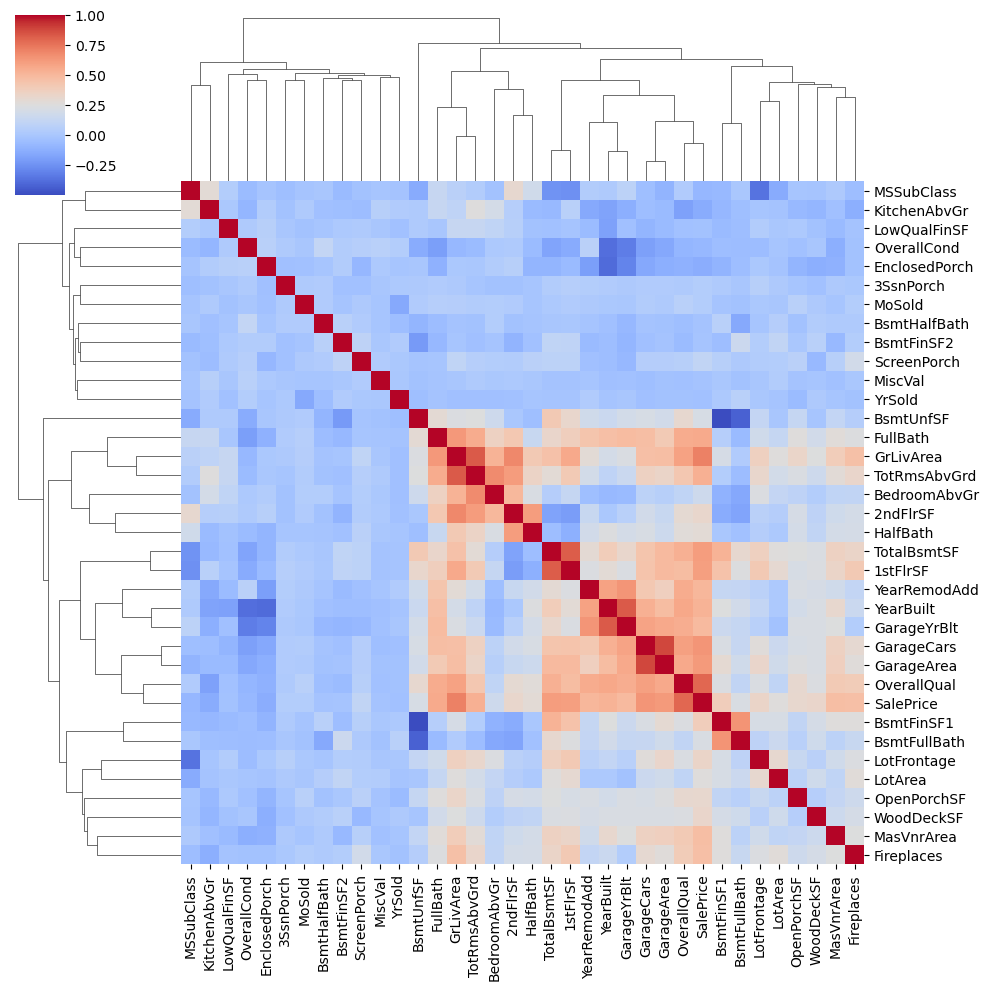

In [18]:
sns.clustermap(data=sp_housing_ds.corr(), cmap="coolwarm", figsize=(10,10))
plt.show()

In the above map, columns marked in warm (i.e. shades of red) colors are closely correlated as opposed to those which are designated by cool (i.e. blue shades). 
Columns such as YearBuilt & GarageYrBlt  have very high correlation with each other. 

When correlated to the SalePrice, we see correlation with few fields that we will analyze now.

#### Step 2 : Exploratory Data Analysis

###### For further analysis, we will first segregate Categorical and Numerical Variables.

In [19]:
# Display Dataset 'info' to check the Data types. 
#The data types 'int64' & 'float64' will be numerical, while the 'object' type will be categorical.
sp_housing_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Alley          1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [20]:
## For further analysis, let's create 2 dataframes one each for Numerical and Categorical variables
## Dtype is to be used to bifurcate the variables as below;

sp_housing_ds_num = sp_housing_ds.select_dtypes(include=['float64', 'int64'])
sp_housing_ds_cat = sp_housing_ds.select_dtypes(include=['object'])

###### Step 2a : Numerical Variables

In [21]:
##  Describe the Numerical dataset
sp_housing_ds_num.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    22.024023    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    70.049958    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.117123   443.639726    46.549315   
std      30.202904     20.645407   180.731373   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   164.250000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

In [22]:
sp_housing_ds_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  MoSold  YrSold  SalePrice  
0              0          0            0        0       2    2008     208500  
1              0          0            0        0       5    2007     181500  
2              0          0            0        0       9    2008     223500  
3            272          0            0        0       2    2006     140000  
4              0          0            0        0      12    2008     250000

In [23]:
# correlation matrix
corr_matrix = sp_housing_ds_num.corr()
corr_matrix 

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.357056 -0.139781     0.032628    -0.059316   
LotFrontage     -0.357056     1.000000  0.306795     0.234196    -0.052820   
LotArea         -0.139781     0.306795  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.234196  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.052820 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.117598  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.082746  0.013788     0.550684     0.073741   
MasVnrArea       0.023573     0.178699  0.103321     0.407252    -0.125694   
BsmtFinSF1      -0.069836     0.215828  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.043340  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.122156 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.363358  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.414266  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.072483  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.036849  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.368392  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.091481  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333    -0.006419  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.180424  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.048258  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.237023  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.005805 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.320146  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.235755  0.271364     0.396765    -0.023820   
GarageYrBlt      0.085072     0.066463 -0.024947     0.547766    -0.324297   
GarageCars      -0.040110     0.269729  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.323663  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.077106  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.137454  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.009790 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.062335  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.037684  0.043160     0.064886     0.054811   
MiscVal         -0.007683     0.001168  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.010158  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.006768 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.334901  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.023573   -0.069836   -0.065649   
LotFrontage     0.117598      0.082746    0.178699    0.215828    0.043340   
LotArea         0.014228      0.013788    0.103321    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.407252    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.125694   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.311600    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.176529    0.128451   -0.067759   
MasVnrArea      0.311600      0.176529    1.000000    0.261256   -0.071330   
BsmtFinSF1      0.249503      0.128451    0.261256    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.071330   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.113862   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.360067    0.522396    0.104810   
1stFlrSF        0.281986      0.240379    0.339850    0.445863    0.097117   
2ndFlrSF        0.010308      0.1400

In [24]:
## Define function to generate scatter plot to represent the numerical columns from dataset

def Num_Var_Analysis_Scatter(df_param): 
    fig,axs= plt.subplots(12,3,figsize=(20,80))
    for i,ax in zip(df_param.columns,axs.flatten()):
        sns.scatterplot(x=i, y='SalePrice', hue='SalePrice', data=df_param,ax=ax,palette='icefire')

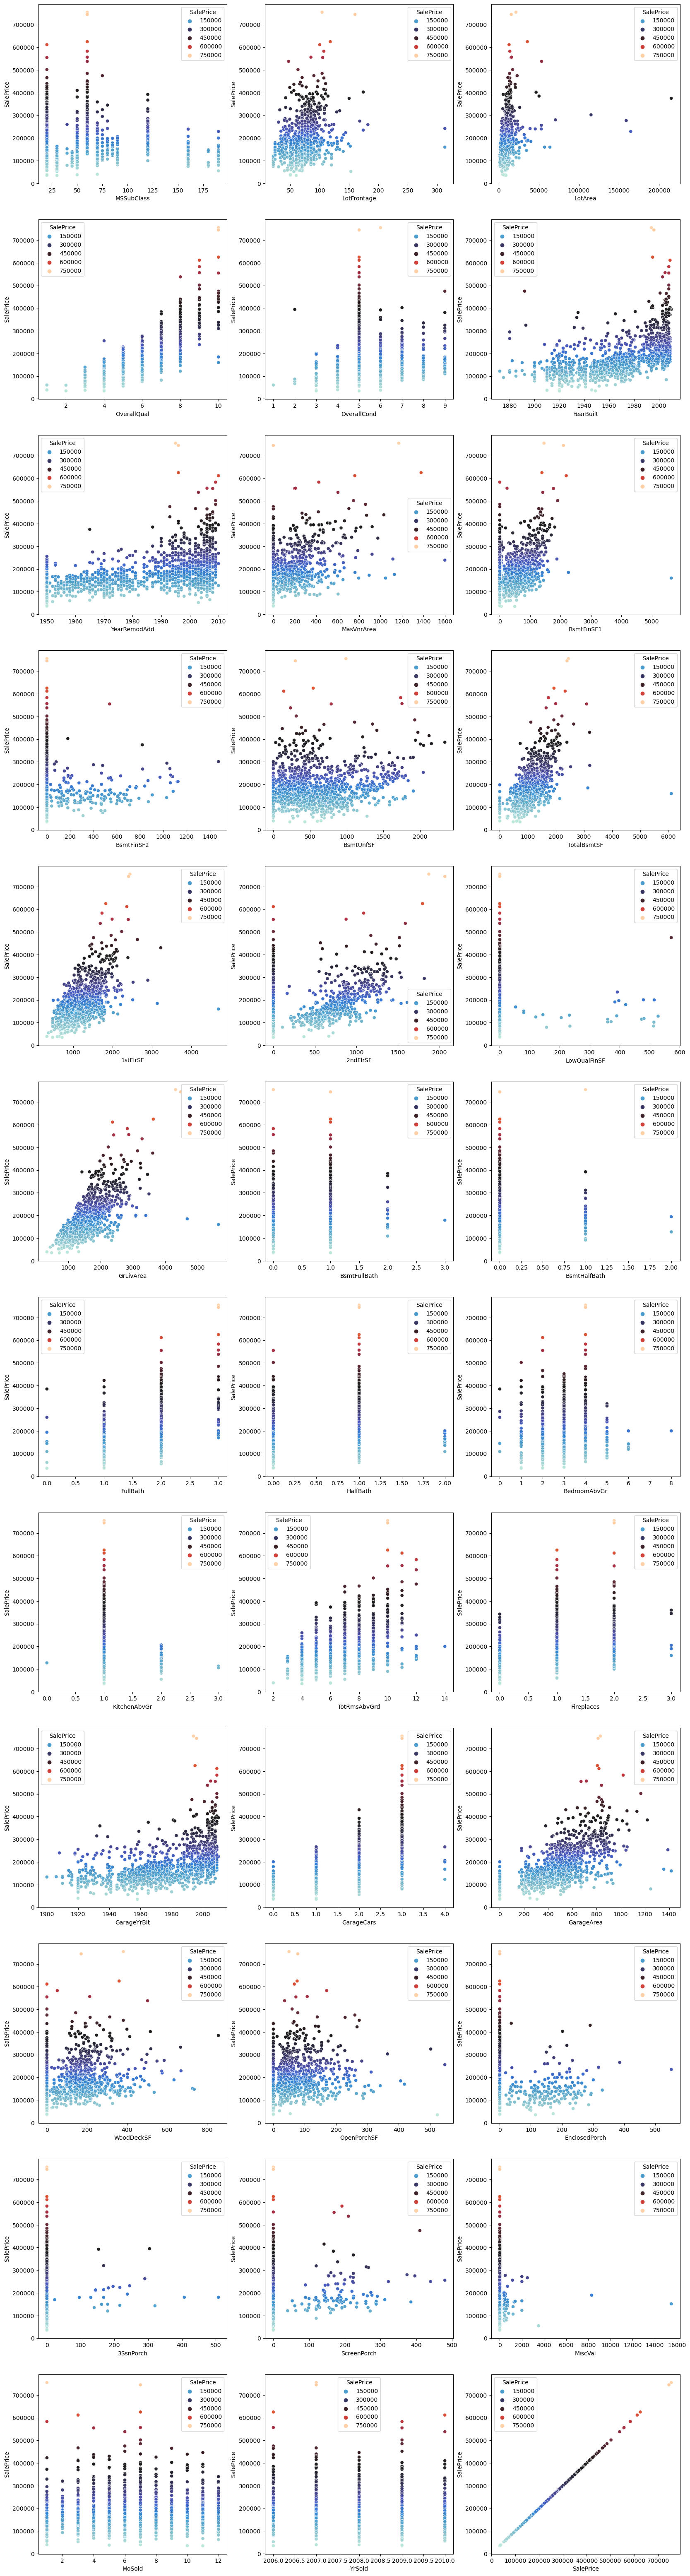

In [25]:
## Scatter plot for numerical columns
Num_Var_Analysis_Scatter(sp_housing_ds_num)

In [26]:
## Identify columns having absolute correlation value > 0.5. We will analyze these in more detail.
corr_matrix = sp_housing_ds_num.corr()
corr_matrix[corr_matrix.abs()>0.5]['SalePrice']

MSSubClass            NaN
LotFrontage           NaN
LotArea               NaN
OverallQual      0.790982
OverallCond           NaN
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea            NaN
BsmtFinSF1            NaN
BsmtFinSF2            NaN
BsmtUnfSF             NaN
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF              NaN
LowQualFinSF          NaN
GrLivArea        0.708624
BsmtFullBath          NaN
BsmtHalfBath          NaN
FullBath         0.560664
HalfBath              NaN
BedroomAbvGr          NaN
KitchenAbvGr          NaN
TotRmsAbvGrd     0.533723
Fireplaces            NaN
GarageYrBlt           NaN
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF            NaN
OpenPorchSF           NaN
EnclosedPorch         NaN
3SsnPorch             NaN
ScreenPorch           NaN
MiscVal               NaN
MoSold                NaN
YrSold                NaN
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [27]:
sp_housing_ds_num_rev = sp_housing_ds_num[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']]

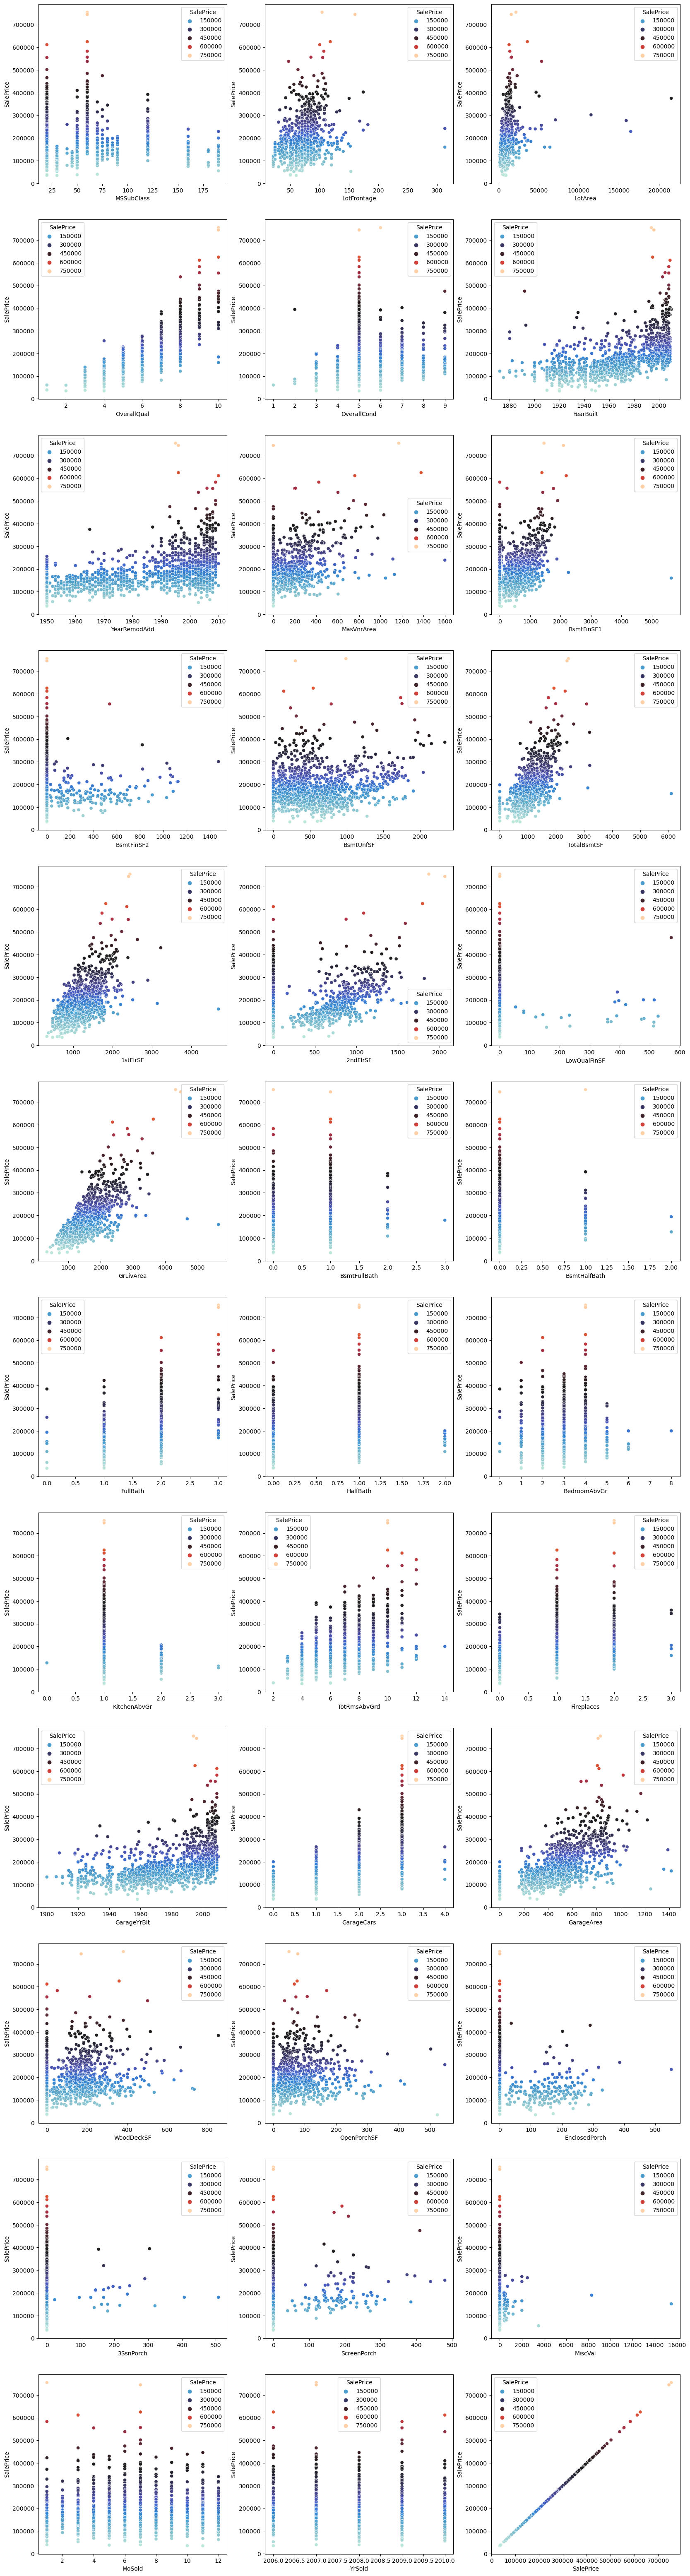

In [28]:
## Scatter plot for selective numerical columns having higher correlation
Num_Var_Analysis_Scatter(sp_housing_ds_num)

##### Observations :

1. OverallQual : High correlation with Sale price. As the material and finish quality increases, Sale price increases.
2. YearBuilt, GarageYrBuilt : The newer the house (and garage), higher the Sale price.
3. GrLivArea, 1stFlrSF, 2ndFlrSF,TotalBsmtSF : The area in Sq Feet naturally contributes to SalePrice. Higher the area on Ground or higher floor, higher the price. Similarly, higher the basement area, higher the price.
4. LotFrontage : Higher the Lotfrontage, higher the SalePrice. This is probably because of customer's preference to have larger spaces between houses.

Another Observation here ... There are several columns such as OpenPorchSF, 3SsnPorch, BsmtFinSF1, BsmtFinSF2 which may not be looked at separately, although they're present as separate variables. From customer's standpoint, the overall features such as Total usable area, Porch size, Total number of bathrooms may be more important that will drive the price point.

In Step-3a, we will define some derived variables that will take care of this.

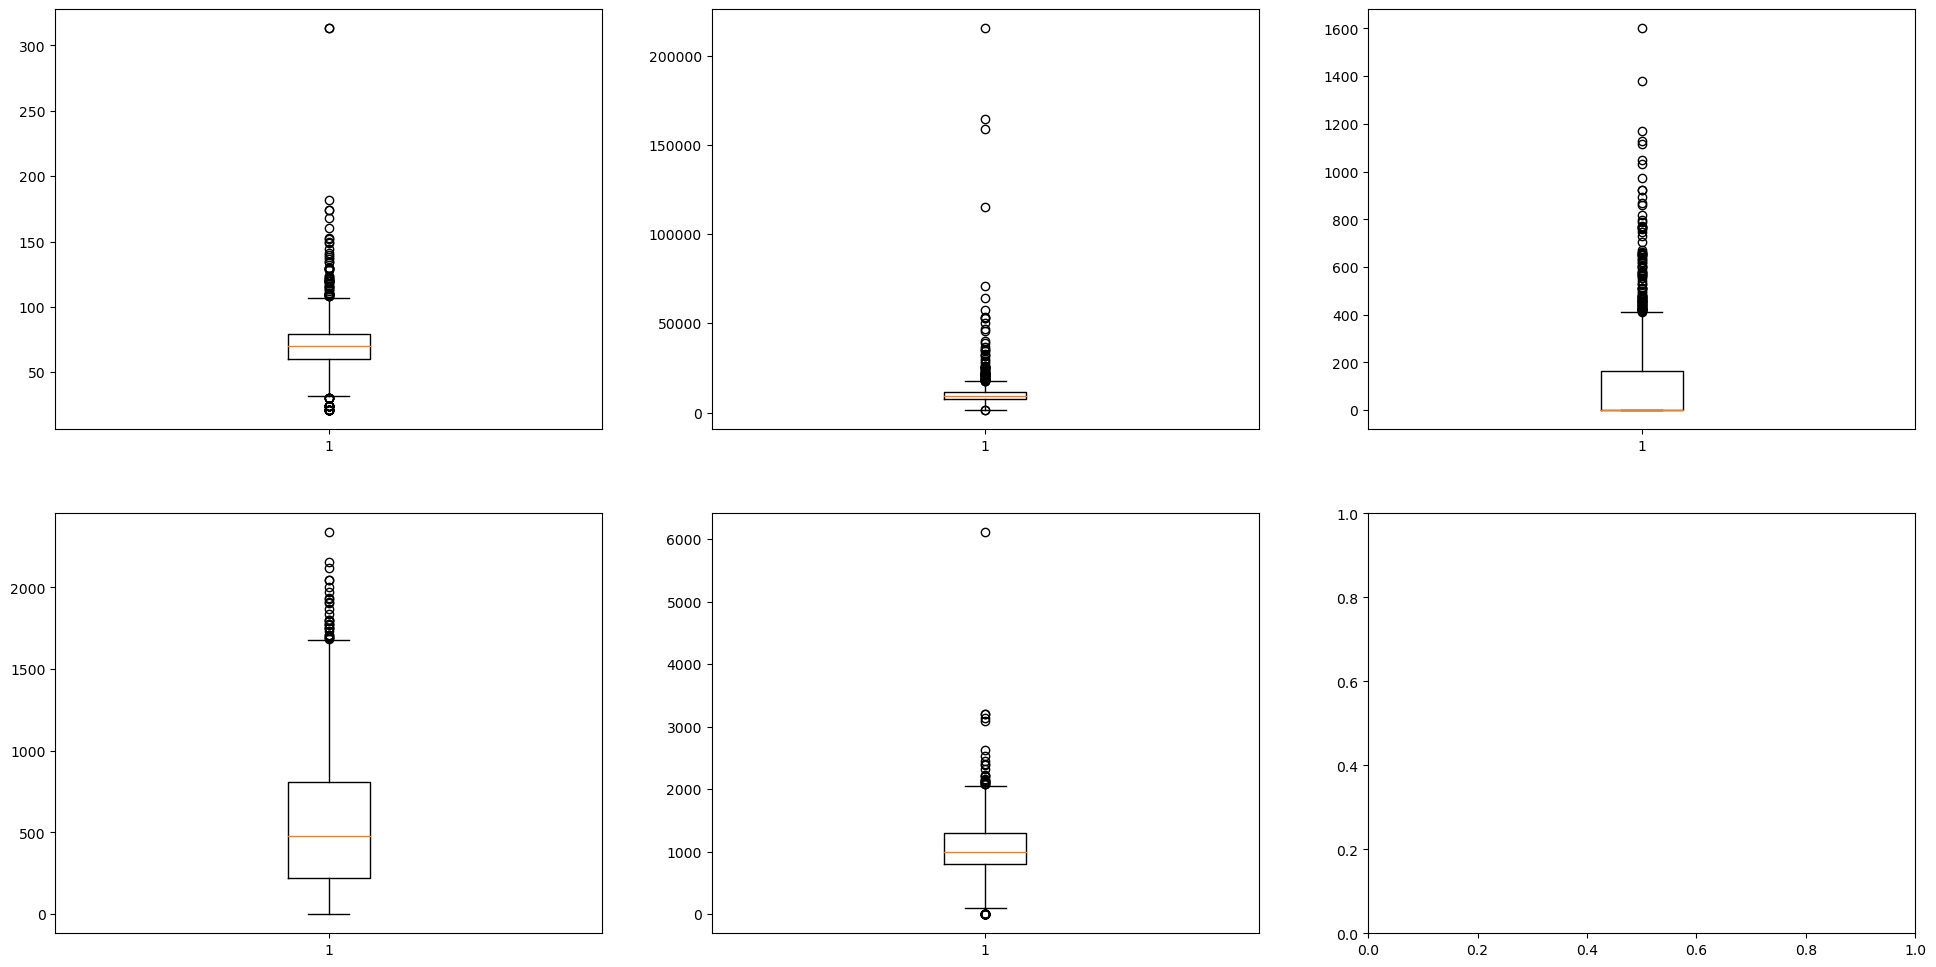

In [29]:
plt.figure(figsize=(24, 12))
plt.subplot(2,3,1)
plt.boxplot(sp_housing_ds.LotFrontage)
plt.subplot(2,3,2)
plt.boxplot(sp_housing_ds.LotArea)
plt.subplot(2,3,3)
plt.boxplot(sp_housing_ds.MasVnrArea)
plt.subplot(2,3,4)
plt.boxplot(sp_housing_ds.BsmtUnfSF)
plt.subplot(2,3,5)
plt.boxplot(sp_housing_ds.TotalBsmtSF)
plt.subplot(2,3,6)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x230edb74550>,
 'caps': [<matplotlib.lines.Line2D at 0x230edb5a450>,
 'boxes': [<matplotlib.lines.Line2D at 0x230edb755d0>],
 'medians': [<matplotlib.lines.Line2D at 0x230edb5bf10>],
 'fliers': [<matplotlib.lines.Line2D at 0x230edb5b590>],
 'means': []}

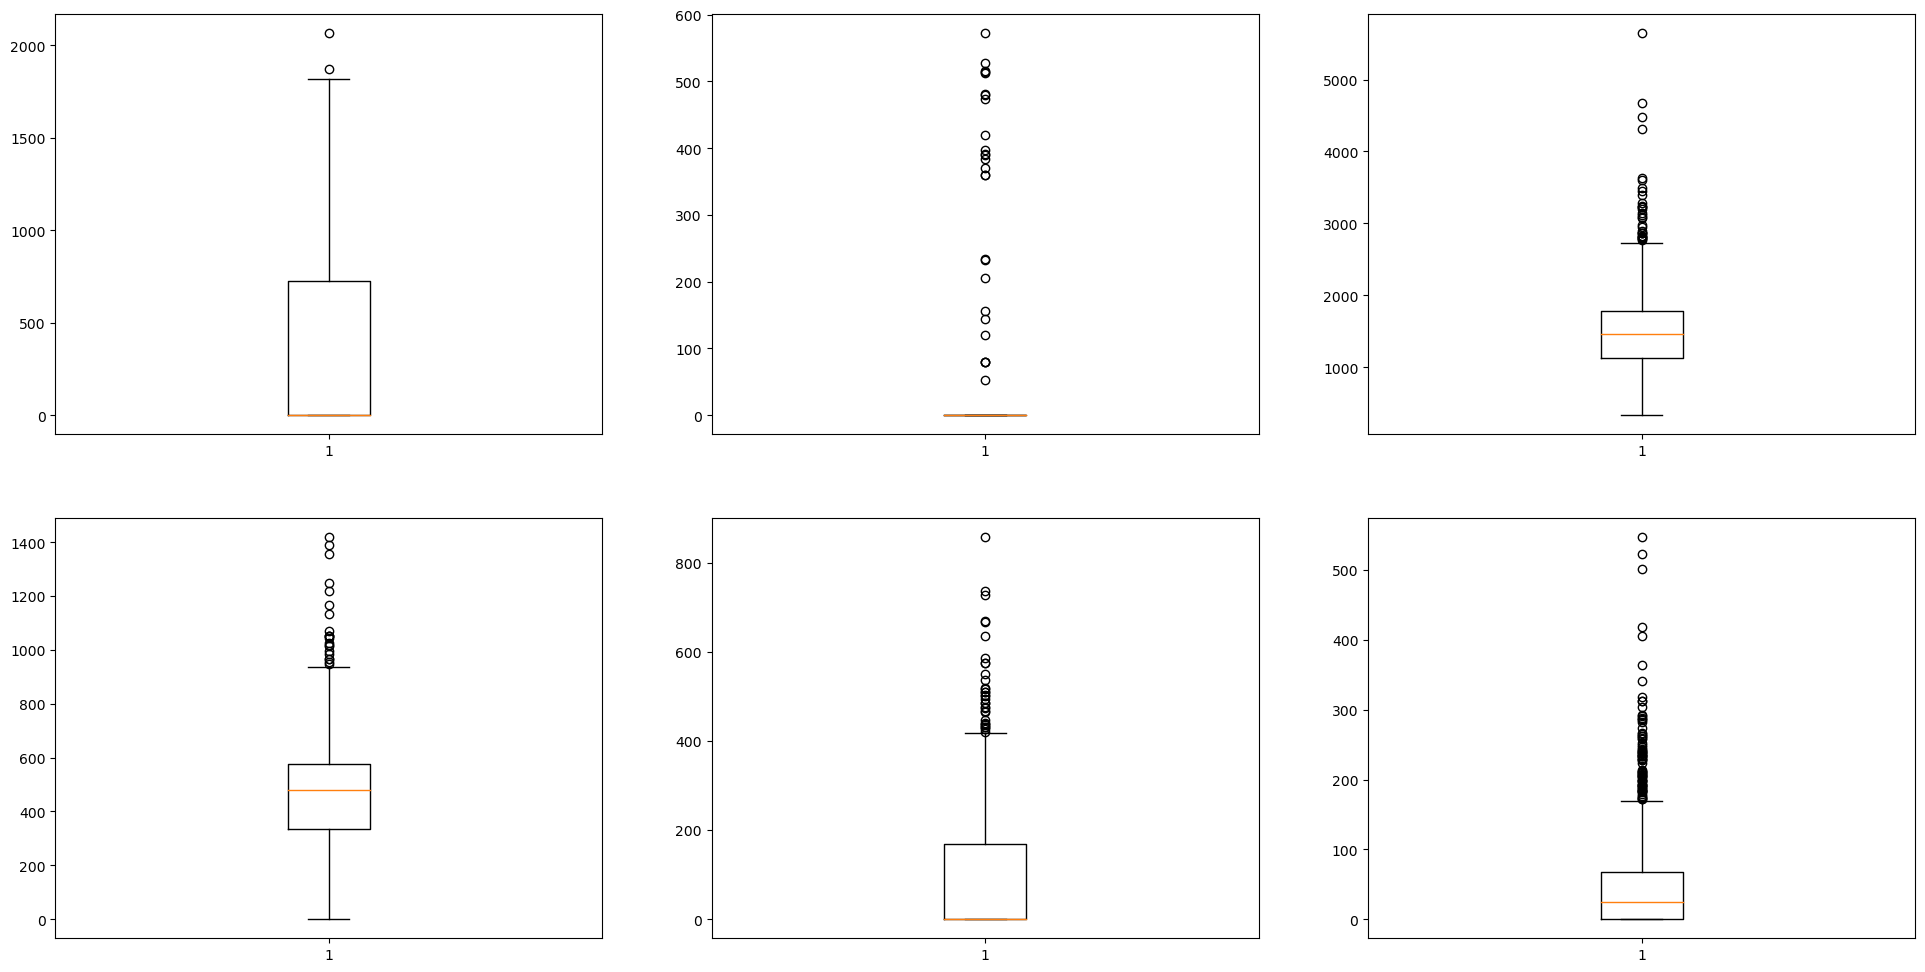

In [30]:
plt.figure(figsize=(24, 12))
plt.boxplot(sp_housing_ds['1stFlrSF'])
plt.subplot(2,3,1)
plt.boxplot(sp_housing_ds['2ndFlrSF'])
plt.subplot(2,3,2)
plt.boxplot(sp_housing_ds.LowQualFinSF)
plt.subplot(2,3,3)
plt.boxplot(sp_housing_ds.GrLivArea)
plt.subplot(2,3,4)
plt.boxplot(sp_housing_ds.GarageArea)
plt.subplot(2,3,5)
plt.boxplot(sp_housing_ds.WoodDeckSF)
plt.subplot(2,3,6)
plt.boxplot(sp_housing_ds.OpenPorchSF)

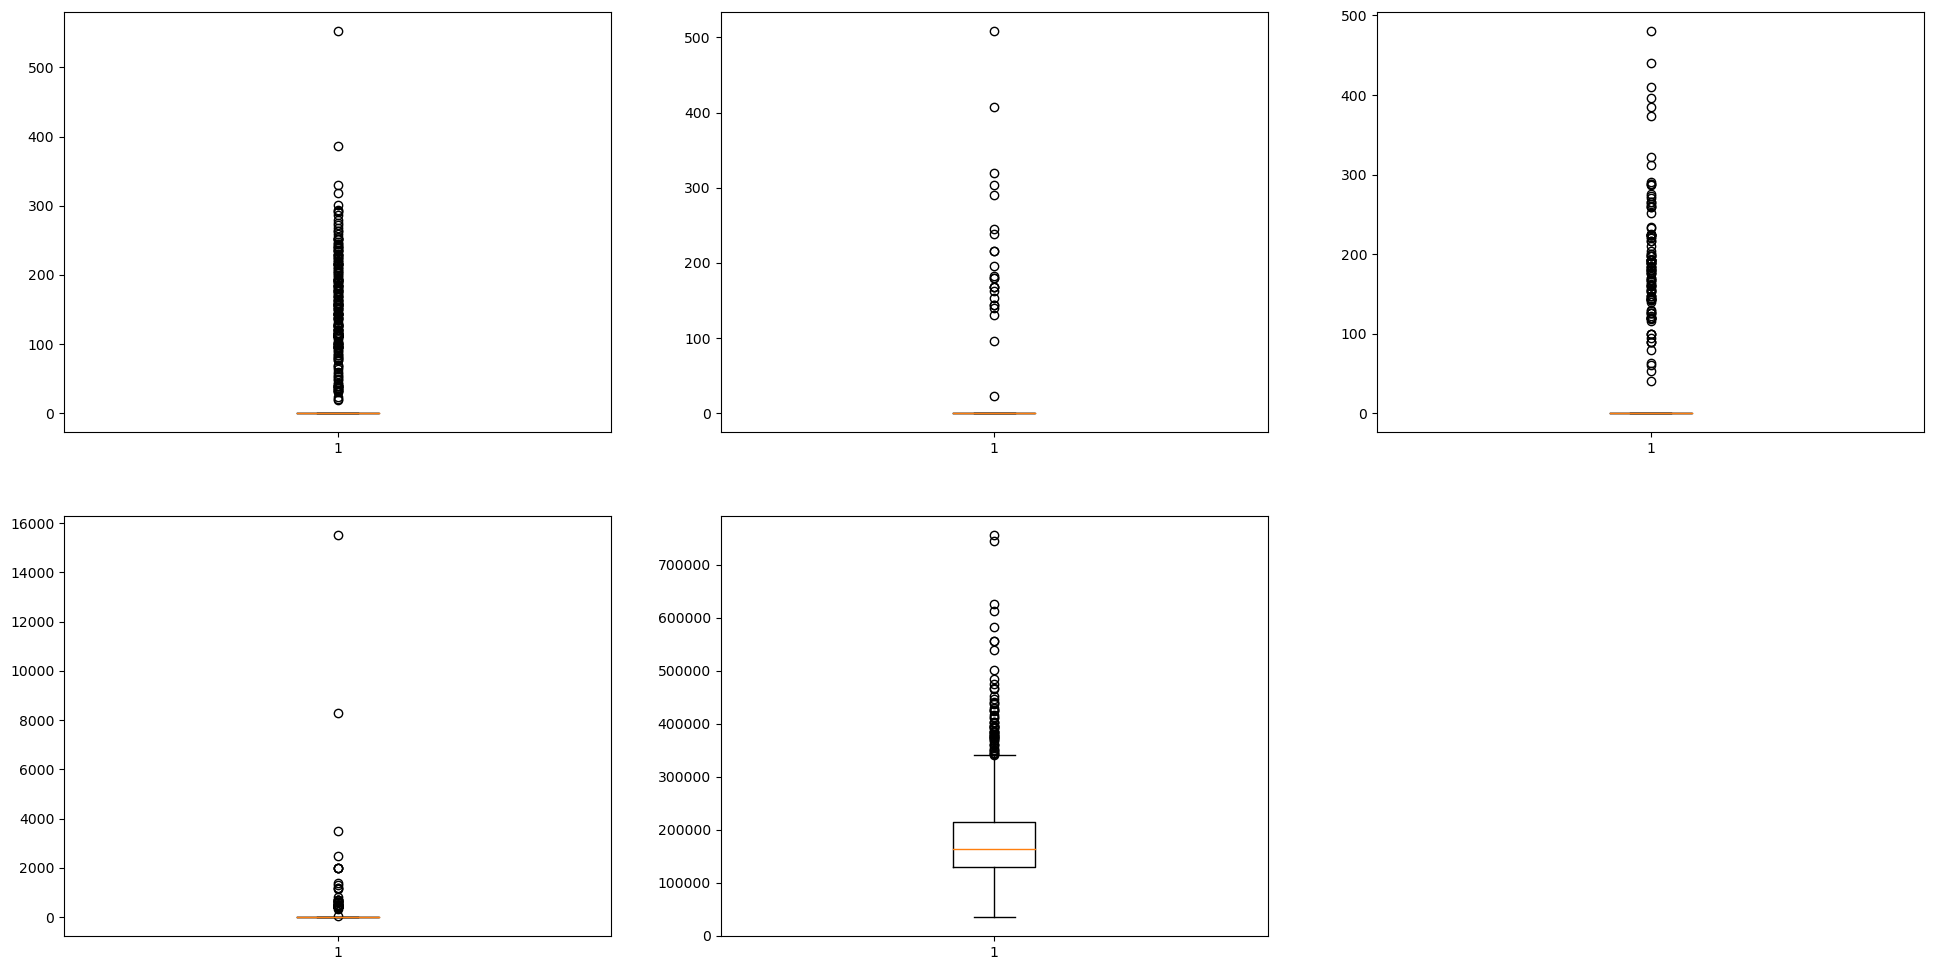

In [31]:
plt.figure(figsize=(24, 12))
plt.subplot(2,3,1)
plt.boxplot(sp_housing_ds.EnclosedPorch)
plt.subplot(2,3,2)
plt.boxplot(sp_housing_ds['3SsnPorch'])
plt.subplot(2,3,3)
plt.boxplot(sp_housing_ds.ScreenPorch)
plt.subplot(2,3,4)
plt.boxplot(sp_housing_ds.MiscVal)
plt.subplot(2,3,5)
plt.boxplot(sp_housing_ds.SalePrice)
plt.show()

We see a few outliers in the above box plots and will selectively treat them under Step 3b.

###### Step 2b : Categorical Variables

In [32]:
sp_housing_ds_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Alley          1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   LotConfig      1460 non-null   object
 5   LandSlope      1460 non-null   object
 6   Neighborhood   1460 non-null   object
 7   Condition1     1460 non-null   object
 8   Condition2     1460 non-null   object
 9   BldgType       1460 non-null   object
 10  HouseStyle     1460 non-null   object
 11  RoofStyle      1460 non-null   object
 12  RoofMatl       1460 non-null   object
 13  Exterior1st    1460 non-null   object
 14  Exterior2nd    1460 non-null   object
 15  MasVnrType     1460 non-null   object
 16  ExterQual      1460 non-null   object
 17  ExterCond      1460 non-null   object
 18  Foundation     1460 non-null

In [33]:
sp_housing_ds_cat.head()

MSZoning            Alley LotShape LandContour LotConfig LandSlope  \
0       RL  No Alley access      Reg         Lvl    Inside       Gtl   
1       RL  No Alley access      Reg         Lvl       FR2       Gtl   
2       RL  No Alley access      IR1         Lvl    Inside       Gtl   
3       RL  No Alley access      IR1         Lvl    Corner       Gtl   
4       RL  No Alley access      IR1         Lvl       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional   FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ  No Fireplace     Attchd   
1          Y      SBrkr          TA        Typ            TA     Attchd   
2          Y      SBrkr          Gd        Typ            TA     Attchd   
3          Y      SBrkr          Gd        Typ            Gd     Detchd   
4          Y      SBrkr          Gd        Typ            TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive     Fence MiscFeature  \
0          RFn         TA         TA          Y  No Fence        None   
1          RFn         TA         TA          Y  No Fence        None   
2          RFn         TA         TA          Y  No Fence        None   
3          Unf         TA         TA          Y  No Fence        None   
4          RFn         TA         TA          Y  No Fence        None   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

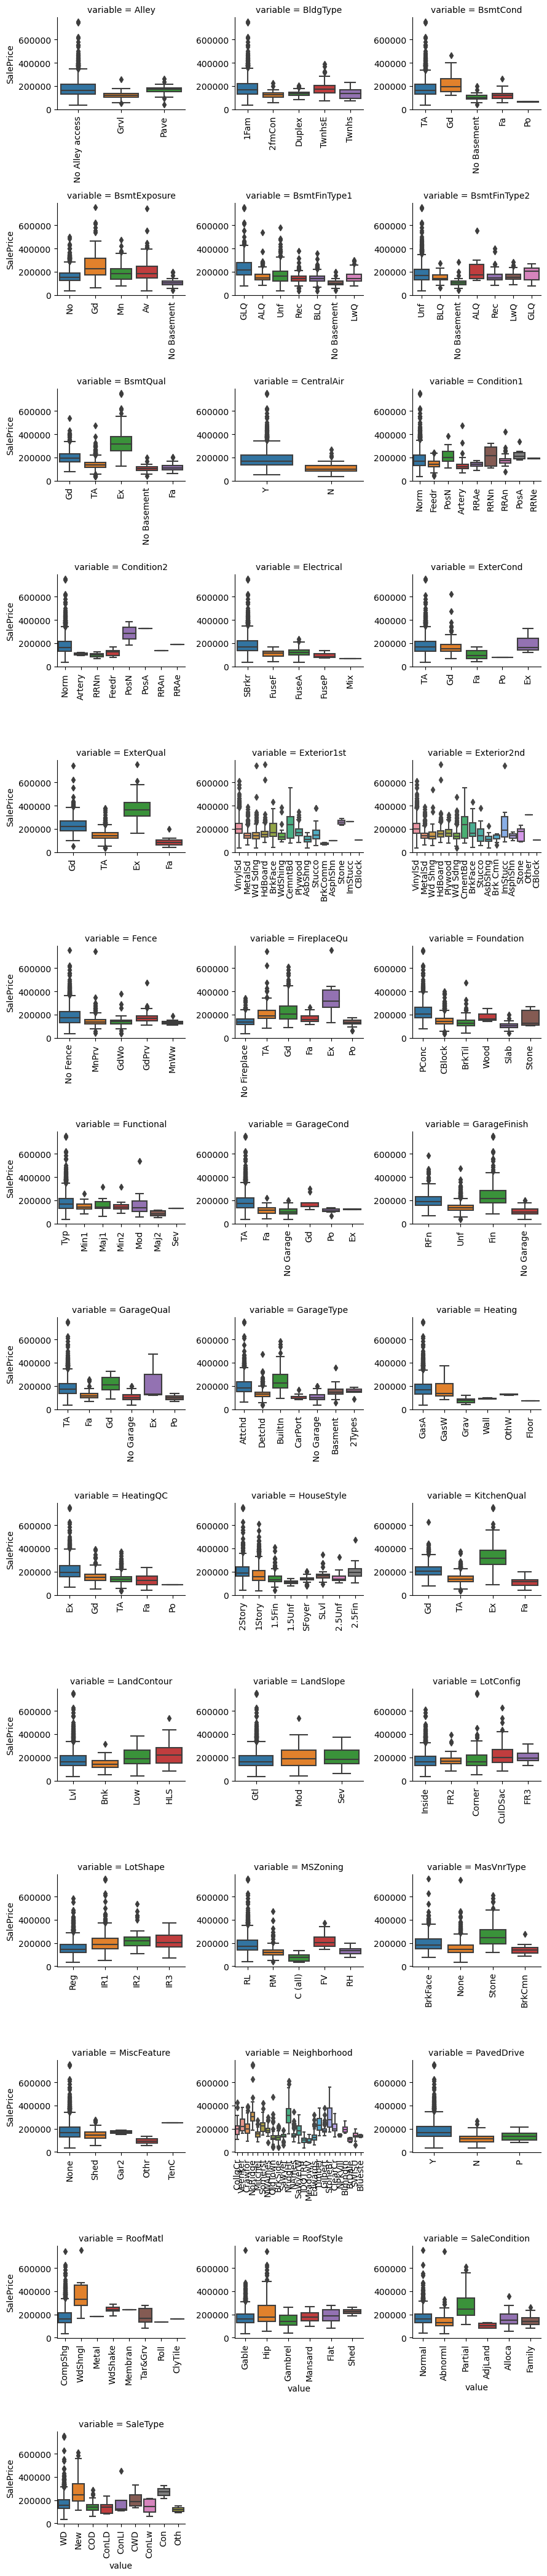

In [34]:
## Define function to generate boxplot to represent the categorical columns from dataset

def fgrid_bxplot(x_var, y_var, **kwargs):
    sns.boxplot(x=x_var, y=y_var)
    x=plt.xticks(rotation=90)
    
melt = pd.melt(sp_housing_ds, id_vars=['SalePrice'], value_vars=sorted(sp_housing_ds[sp_housing_ds_cat.columns]))
g = sns.FacetGrid(melt, col="variable",col_wrap=3, sharex=False, sharey=False)
g = g.map(fgrid_bxplot, "value", "SalePrice")

Some of the observations from the plots above are as follows:
1) Basement condition & Quality drives the Sale price of property. Better the condition & Quality, higher the price.

2) Higher the quality of exterior material/fireplace/Kitchen, better is the Sale Price. 

3) New properties are sold at higher prices than the rest categories.

4) Presence of Central Air conditioning as well as better quality/condition of Heating increases property Sale Price.

5) Properties with Paved driveway are sold at higher prices.

#### Step 3 : Data preparation for Model Building

##### Step 3a : Defining Derived Columns

In [35]:
# Overall Usable Living area in sq feet
sp_housing_ds['Total_Usable_Living_Area'] = (sp_housing_ds['BsmtFinSF1'] + sp_housing_ds['BsmtFinSF2'] + sp_housing_ds['1stFlrSF'] + sp_housing_ds['2ndFlrSF'])

# Total Number of Bathrooms. Multiplication factor of 0.5 used for half bathrooms
sp_housing_ds['Total_Bathroom_Count'] = (sp_housing_ds['FullBath'] + (0.5 * sp_housing_ds['HalfBath']) + sp_housing_ds['BsmtFullBath'] + (0.5 * sp_housing_ds['BsmtHalfBath']))

# Overall Porch area in sq feet
sp_housing_ds['Total_Porch_Area'] = (sp_housing_ds['OpenPorchSF'] + sp_housing_ds['3SsnPorch'] + sp_housing_ds['EnclosedPorch'] + sp_housing_ds['ScreenPorch'] + sp_housing_ds['WoodDeckSF'])

# Property Age can be calculated instead of using the year built
sp_housing_ds['property_age']=sp_housing_ds['YrSold']-sp_housing_ds['YearBuilt']
sp_housing_ds['garage_age'] = sp_housing_ds['YrSold'] - sp_housing_ds['GarageYrBlt']
sp_housing_ds['remodel_age'] = sp_housing_ds['YrSold'] - sp_housing_ds['YearRemodAdd']

In [36]:
#Creating Dummy Variables for Categorical Columns
num_col=[]
cat_col=[]
for i in sp_housing_ds.columns:
    if sp_housing_ds[i].dtypes != 'O':
        num_col.append(i)
    else:
        cat_col.append(i)
sp_housing_ds_dummy= pd.get_dummies(sp_housing_ds[cat_col])   
sp_housing_ds=pd.concat([sp_housing_ds,sp_housing_ds_dummy],axis=1)
sp_housing_ds= sp_housing_ds.drop(cat_col,axis=1)  

##### Step 3b : Outlier Treatment

In [37]:
sp_housing_ds.shape

(1460, 300)

In [38]:
## Treating outliers across selected columns

In [39]:
list = []
outl_col = ['GrLivArea','GarageArea','TotalBsmtSF','LotArea']
for col in outl_col:
    Q1 = sp_housing_ds[col].quantile(.25)
    Q3 = sp_housing_ds[col].quantile(.99)
    IQR = Q3-Q1
    sp_housing_ds =  sp_housing_ds[(sp_housing_ds[col] >= (Q1-(1.5*IQR))) & (sp_housing_ds[col] <= (Q3+(1.5*IQR)))]

In [40]:
sp_housing_ds.shape

(1455, 300)

In [41]:
# List of columns with Null Values
print(round(sp_housing_ds.isnull().sum()/len(sp_housing_ds.index)*100,2).sort_values(ascending=False)[ round(sp_housing_ds.isnull().sum()/len(sp_housing_ds.index),2) > 0 ] )

garage_age     5.57
GarageYrBlt    5.57
dtype: float64


In [42]:
## where garage_age is null, it can be replaced by 0

sp_housing_ds['garage_age'] = sp_housing_ds['garage_age'].fillna(0)

In [43]:
X = sp_housing_ds.drop('SalePrice',axis=1)
y = sp_housing_ds['SalePrice']

In [44]:
## Drop the variables that are already used to create Derived variables
X.drop(['GarageYrBlt','BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','WoodDeckSF'],axis=1,inplace=True)

In [45]:
X.shape

(1455, 285)

In [46]:
## Calculate Correlation Matrix for X, with absolute correlation higher than 50%
corr_matrix = X.corr()
M1 = corr_matrix[abs(corr_matrix)>=.5]
M2 = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape)).astype(bool))
Fin_corr_matrix = M2.stack()
Fin_corr_matrix[abs(Fin_corr_matrix)>=.5]

MSSubClass                BldgType_1Fam              -0.816893
                          BldgType_TwnhsE             0.527260
OverallQual               YearBuilt                   0.572132
                          YearRemodAdd                0.550800
                          TotalBsmtSF                 0.543296
                          GrLivArea                   0.592628
                          GarageCars                  0.602025
                          GarageArea                  0.558859
                          Total_Usable_Living_Area    0.540830
                          Total_Bathroom_Count        0.540683
                          property_age               -0.572455
                          remodel_age                -0.552767
                          ExterQual_Gd                0.551963
                          ExterQual_TA               -0.647338
                          Foundation_PConc            0.569024
                          KitchenQual_TA             -0

In [47]:
## Based on above correlation value, we can further drop following variables
X.drop(['OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','BsmtUnfSF','TotalBsmtSF','GrLivArea','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageCars','MSZoning_FV','MSZoning_RL','Alley_Grvl','LotShape_IR1','LandContour_Bnk','LotConfig_Corner','LandSlope_Gtl','Neighborhood_NPkVill','Condition1_Feedr','Condition2_Feedr','Condition2_RRAe','BldgType_1Fam','HouseStyle_1Story','RoofStyle_Flat','RoofStyle_Gable','RoofMatl_CompShg','Exterior2nd_AsbShng','Exterior2nd_BrkFace','Exterior2nd_CBlock','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_MetalSd','Exterior2nd_Plywood','Exterior2nd_Stucco','Exterior2nd_VinylSd','MasVnrType_None','ExterQual_Gd','ExterQual_TA','ExterCond_Gd','Foundation_CBlock','Foundation_Slab','BsmtQual_Gd','BsmtCond_Gd','BsmtCond_Po','Heating_GasA','HeatingQC_Ex','CentralAir_N','Electrical_FuseA','KitchenQual_Gd','GarageType_Attchd','GarageQual_Ex','GarageQual_Fa','GarageQual_Gd','GarageQual_Po','GarageQual_TA','GarageCond_Ex','GarageCond_Po','GarageCond_TA','PavedDrive_N','MiscFeature_None','SaleType_New','SaleType_WD','SaleCondition_Normal','Foundation_PConc','MiscFeature_Gar2','Foundation_PConc'],axis=1,inplace=True)

In [48]:
X.shape

(1455, 219)

In [49]:
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'LowQualFinSF',
       'TotRmsAbvGrd', 'GarageArea', 'MiscVal', 'MoSold', 'YrSold',
       ...
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_Oth', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Partial'],
      dtype='object', length=219)

#### Step 4 : Model Building

In [50]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

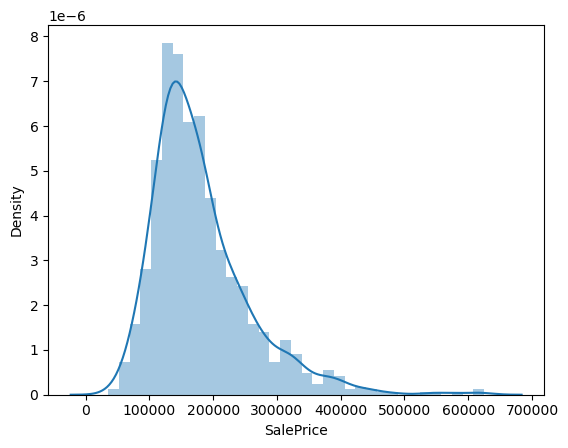

In [51]:
#Distribution of Target Variable
sns.distplot(y_train)
plt.show()

In [52]:
#Transforming the Target feature to make the data gaussian
pt = PowerTransformer(method='box-cox', standardize=False)
y_train = pt.fit_transform(y_train.to_frame())
y_test = pt.transform(y_test.to_frame())

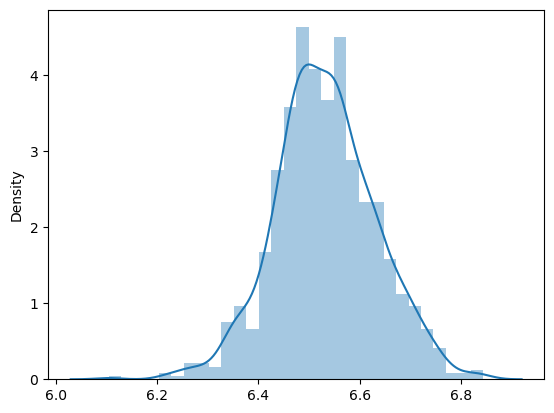

In [53]:
sns.distplot(y_train)
plt.show()

In [54]:
# Scaling the data using a Minmax Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = DataFrame(X_train)
X_train.columns = X.columns
X_test = scaler.transform(X_test)
X_test = DataFrame(X_test)
X_test.columns = X.columns

In [55]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallCond  LowQualFinSF  TotRmsAbvGrd  \
0    0.588235     0.068493  0.052116     0.428571           0.0      0.333333   
1    0.000000     0.136986  0.128504     0.428571           0.0      0.555556   
2    0.235294     0.167979  0.118124     0.428571           0.0      0.555556   
3    0.000000     0.301370  0.106880     0.428571           0.0      0.222222   
4    0.000000     0.236301  0.143217     0.428571           0.0      0.444444   

   GarageArea  MiscVal    MoSold  YrSold  Total_Usable_Living_Area  \
0    0.418705      0.0  0.272727    1.00                  0.317574   
1    0.618705      0.0  0.000000    0.75                  0.245317   
2    0.312230      0.0  0.363636    1.00                  0.335638   
3    0.323741      0.0  0.363636    0.25                  0.190901   
4    0.505036      0.0  0.545455    0.25                  0.489964   

   Total_Bathroom_Count  Total_Porch_Area  property_age  garage_age  \
0              0.571429          0.182992      0.066176    0.084112   
1              0.571429          0.230355      0.007353    0.009346   
2              0.428571          0.206674      0.066176    0.084112   
3              0.000000          0.000000      0.286765    0.364486   
4              0.571429          0.325081      0.036765    0.046729   

   remodel_age  MSZoning_C (all)  MSZoning_RH  MSZoning_RM  \
0     0.150000               0.0          0.0          0.0   
1     0.016667               0.0          0.0          0.0   
2     0.150000               0.0          0.0          0.0   
3     0.650000               0.0          0.0          0.0   
4     0.083333               0.0          0.0          0.0   

   Alley_No Alley access  Alley_Pave  LotShape_IR2  LotShape_IR3  \
0                    1.0         0.0           0.0           0.0   
1                    1.0         0.0           0.0           0.0   
2                    1.0         0.0           0.0           0.0   
3                    1.0         0.0           0.0           0.0   
4                    1.0         0.0           0.0           0.0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0           1.0              0.0              0.0              1.0   
1           0.0              0.0              0.0              1.0   
2           0.0              0.0              0.0              1.0   
3           1.0              0.0              0.0              1.0   
4           0.0              0.0              0.0              1.0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                0.0            0.0            0.0               1.0   
1                0.0            0.0            0.0               1.0   
2                1.0            0.0            0.0               0.0   
3                0.0            0.0            0.0               1.0   
4                0.0            0.0            0.0               0.0   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blmngtn  Neighborhood_Blueste  \
0            0.0            0.0                   0.0                   0.0   
1            0.0            0.0                   0.0                   0.0   
2            0.0            0.0                   0.0                   0.0   
3            0.0            0.0                   0.0                   0.0   
4            0.0            0.0                   0.0                   0.0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                  0.0                   0.0                   0.0   
1                  0.0                   0.0                   0.0   
2                  0.0                   0.0                   0.0   
3                  0.0                   0.0                   0.0   
4                  0.0                   0.0                   0.0   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                   0.0                   0.0                   0

#### Ridge Regression

Fitting 11 folds for each of 28 candidates, totalling 308 fits


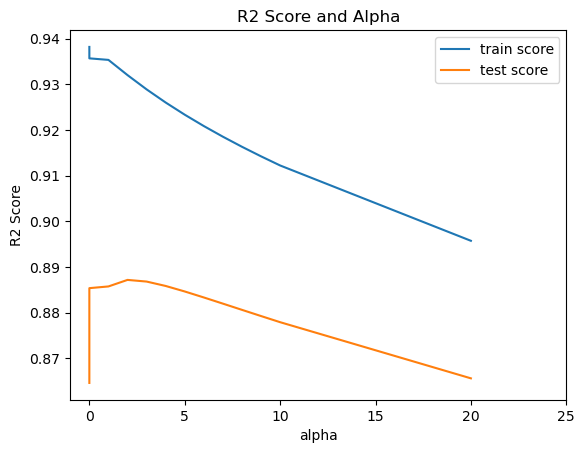

Optimum Alpha for Ridge Regression :  2
R2 Score for Optimium Alpha :  0.8694569097740081
MSE for optimum alpha :  0.0013971780207398894


In [56]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

# Using RFE for top 300 variables
rfe = RFE(estimator=Ridge(), n_features_to_select=300)
rfe = rfe.fit(X_train,y_train)
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]


folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

## Visualization
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('Optimum Alpha for Ridge Regression : ',alpha)
ridge_final = Ridge(alpha=alpha)
ridge_final.fit(X_train_rfe,y_train)
ridge_coef = ridge_final.coef_
y_test_pred = ridge_final.predict(X_test_rfe)
print('R2 Score for Optimium Alpha : ',r2_score(y_test, y_test_pred))
print('MSE for optimum alpha : ', mean_squared_error(y_test, y_test_pred))

In [57]:
#Displaing the co-efficients of the model

ridge_coef2 = pd.DataFrame(np.atleast_2d(ridge_coef),columns=X_train.columns)
ridge_coef2 = ridge_coef2.T
ridge_coef2.rename(columns={0: 'Ridge Co-Efficient'},inplace=True)
ridge_coef2.sort_values(by=['Ridge Co-Efficient'], ascending=False,inplace=True)
print("Ridge Regression : Top 25 features impacting Sale Price : ")
ridge_coef2.head(25)

Ridge Regression : Top 25 features impacting Sale Price : 


Ridge Co-Efficient
Total_Usable_Living_Area            0.144564
TotRmsAbvGrd                        0.069447
GarageArea                          0.063380
OverallCond                         0.056239
LotArea                             0.050034
Neighborhood_Crawfor                0.039005
Neighborhood_StoneBr                0.036733
Total_Porch_Area                    0.036399
LotFrontage                         0.031011
HouseStyle_2.5Unf                   0.026049
ExterCond_Ex                        0.025148
Functional_Typ                      0.023601
Alley_Pave                          0.023286
Heating_GasW                        0.023210
Exterior1st_BrkFace                 0.021931
Condition2_PosA                     0.021517
Neighborhood_NoRidge                0.020354
CentralAir_Y                        0.019891
RoofStyle_Mansard                   0.019887
Total_Bathroom_Count                0.019424
RoofMatl_WdShngl                    0.019167
SaleType_CWD                        0.018795
Condition1_PosN                     0.017645
HouseStyle_1.5Unf                   0.017594
Condition1_Norm                     0.016488

#### Lasso Regression

In [58]:
# Creating a model with an assumed alpha value

lasso1 = Lasso(alpha=0.0001)        
lasso1.fit(X_train, y_train) 

y_test_pred = lasso1.predict(X_test)
print('The R2 Score of the model on the test dataset for 0.0001 alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

The R2 Score of the model on the test dataset for 0.0001 alpha is 0.8628780406543832
The MSE of the model on the test dataset for optimum alpha is 0.0014675904134552114


Fitting 11 folds for each of 11 candidates, totalling 121 fits


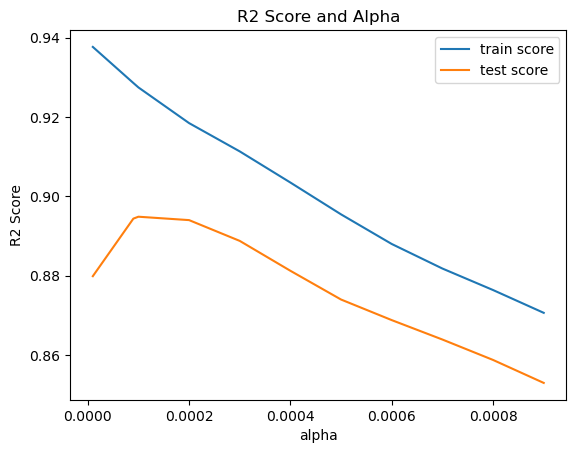

Optimum Alpha for Lasso Regression : 0.0001
R2 Score for Optimium Alpha :  0.8628780406543832
MSE for optimum alpha :  0.0014675904134552114


In [59]:
# Building a Lasso Model with GridSearch CV to find the optimum alpha
params = {'alpha': [0.00001, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009 ]}
lasso = Lasso(random_state=100)

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('Optimum Alpha for Lasso Regression :',alpha)
lasso_final2 = Lasso(alpha=alpha,random_state=100)
lasso_final2.fit(X_train,y_train)
lasso_coef2 = lasso_final2.coef_
y_test_pred = lasso_final2.predict(X_test)
print("R2 Score for Optimium Alpha : " ,r2_score(y_test, y_test_pred))
print("MSE for optimum alpha : ", mean_squared_error(y_test, y_test_pred))

In [63]:
#Displaing the co-efficients of the model
lasso_cf = pd.DataFrame(np.atleast_2d(lasso_coef2),columns=X_train.columns)
lasso_cf = lasso_cf.T
lasso_cf.rename(columns={0: "Lasso Co-Efficient"},inplace=True)
lasso_cf.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
print("Ridge Regression : Top 25 features impacting Sale Price : ")
lasso_cf.head(25)

Ridge Regression : Top 25 features impacting Sale Price : 


Lasso Co-Efficient
Total_Usable_Living_Area            0.204994
TotRmsAbvGrd                        0.071349
GarageArea                          0.070267
OverallCond                         0.063130
LotArea                             0.050082
Neighborhood_Crawfor                0.039055
Total_Porch_Area                    0.037710
Neighborhood_StoneBr                0.030991
Functional_Typ                      0.023347
Exterior1st_BrkFace                 0.021104
CentralAir_Y                        0.019499
Alley_Pave                          0.018923
LotFrontage                         0.018211
Heating_GasW                        0.015704
Neighborhood_Somerst                0.015434
Condition1_Norm                     0.015128
Neighborhood_NoRidge                0.014039
BsmtFinType1_Unf                    0.013566
HouseStyle_2.5Unf                   0.013245
BsmtExposure_Gd                     0.013160
KitchenQual_Ex                      0.012093
BsmtFinType2_Unf                    0.011663
Neighborhood_NridgHt                0.010484
BsmtQual_Ex                         0.010058
HouseStyle_1.5Fin                   0.009843

### Conclusion

Based on the results obtained from both Ridge and Lasso Regression, we can see following columns/features are affecting the SalePrice the most, and Surprise Housing should plan their strategy based on these.

Parameters pertaining to number of rooms or area available 
1. Total_Usable_Living_Area
2. TotRmsAbvGrd	
3. GarageArea
4. LotArea

Parameter pertainng to condition/quality

5. OverallCond

Parameter pertaining to surroundings

6. Neighborhood_Crawfor